In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import tqdm
import seaborn as sns
import scipy.stats as stats

from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score


In [2]:
df = pd.read_csv('Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
df.describe(include='all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,24390
mean,NaN,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,85.232557,2017.820427,7.423653,15.596995,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,NaN
std,NaN,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,85.930817,0.383836,3.069894,8.740447,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN


In [5]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [6]:
# Drop booking ID, not needed
df.drop(['Booking_ID'], axis=1, inplace=True)
df.head(3)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled


In [7]:
df.groupby(by='booking_status').mean()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
booking_status,,,,,,,,,,,,,,
Canceled,1.909550,0.124358,0.887505,2.392259,0.009592,139.215482,2017.919142,7.374253,15.730080,0.001346,0.005553,0.002188,110.589966,0.334623
Not_Canceled,1.813489,0.095982,0.773309,2.112710,0.041410,58.927224,2017.772325,7.447724,15.532144,0.037474,0.032021,0.227101,99.931412,0.758549


In [8]:
### Mapping target column to 0 and 1
df['booking_status'] = df['booking_status'].map({'Not_Canceled':0,'Canceled':1})
df['type_of_meal_plan'] = df['type_of_meal_plan'].map({'Meal Plan 1':0,'Meal Plan 2':1,'Meal Plan 3':2,'Not Selected' : 3})
df['room_type_reserved'] = df['room_type_reserved'].map({'Room_Type 1':0,'Room_Type 2':1,'Room_Type 3':2,'Room_Type 4':3,'Room_Type 5':4,'Room_Type 6':5,'Room_Type 7':6})
df['market_segment_type'] = df['market_segment_type'].map({'Online':0,'Offline':1,'Corporate':2,'Complementary':3,'Aviation':4})
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,1,0,0,0,65.00,0,0
1,2,0,2,3,3,0,0,5,2018,11,6,0,0,0,0,106.68,1,0
2,1,0,2,1,0,0,0,1,2018,2,28,0,0,0,0,60.00,0,1
3,2,0,0,2,0,0,0,211,2018,5,20,0,0,0,0,100.00,0,1
4,2,0,1,1,3,0,0,48,2018,4,11,0,0,0,0,94.50,0,1


/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


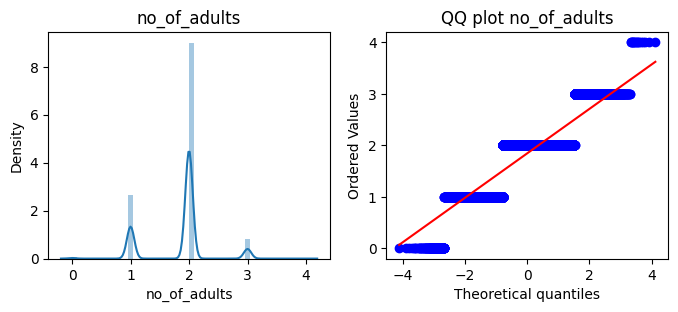

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


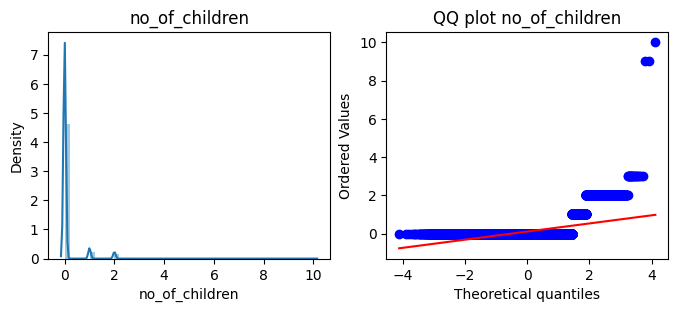

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


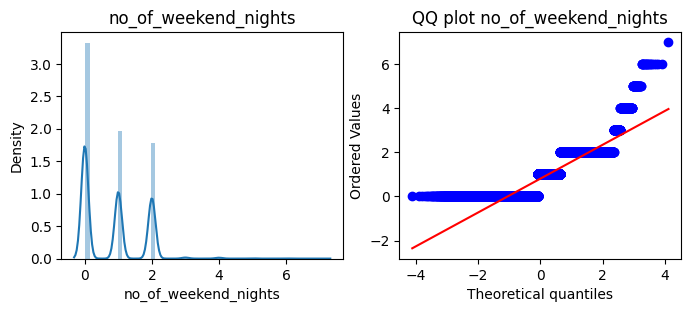

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


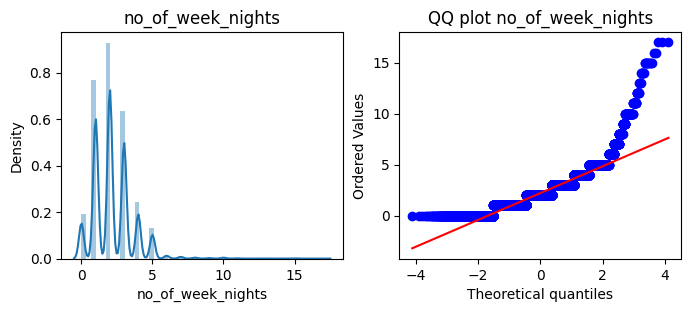

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


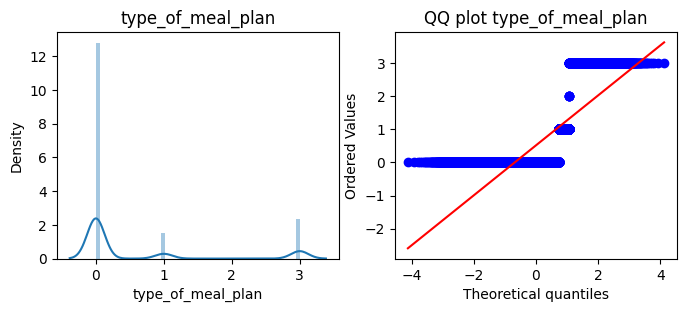

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


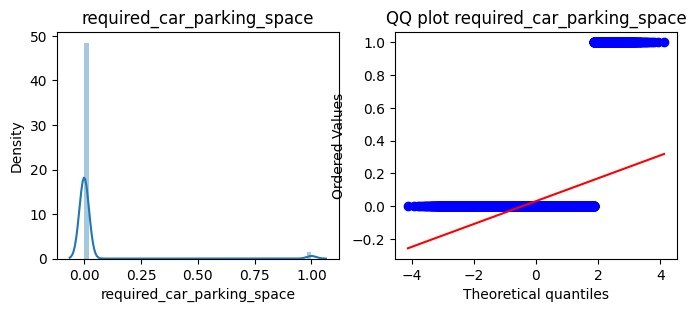

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


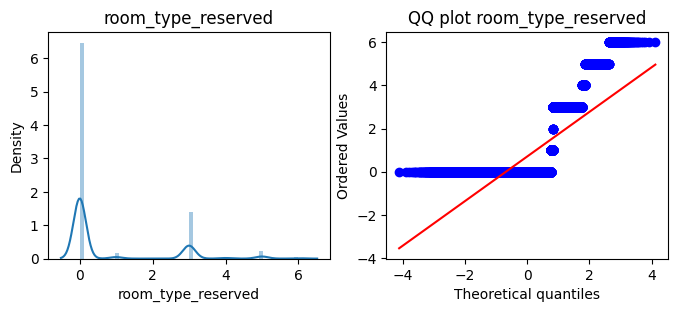

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


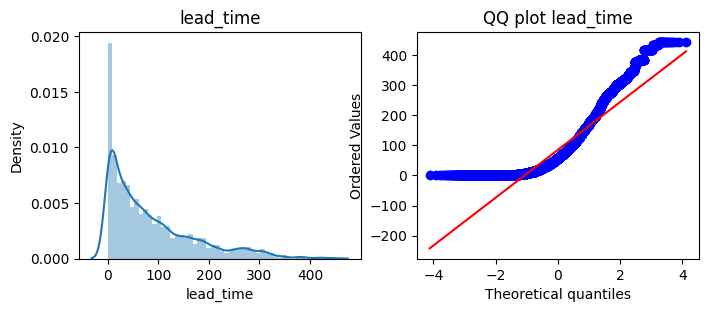

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


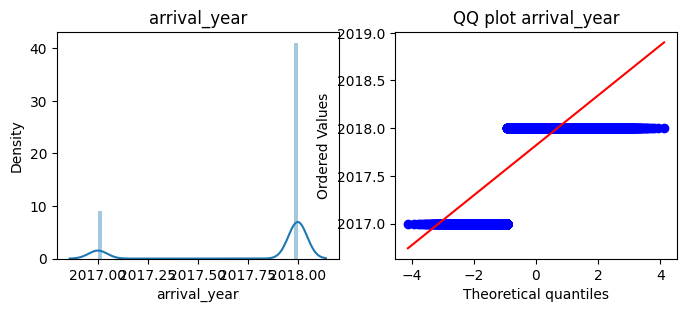

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


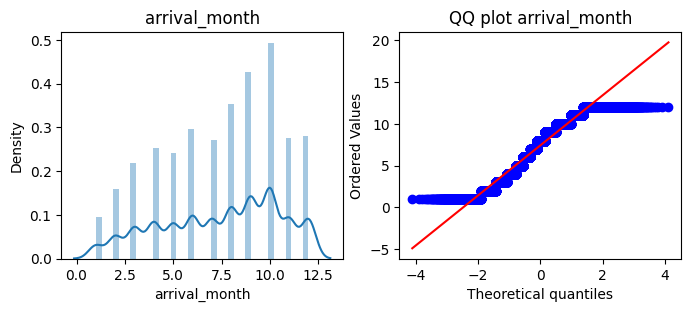

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


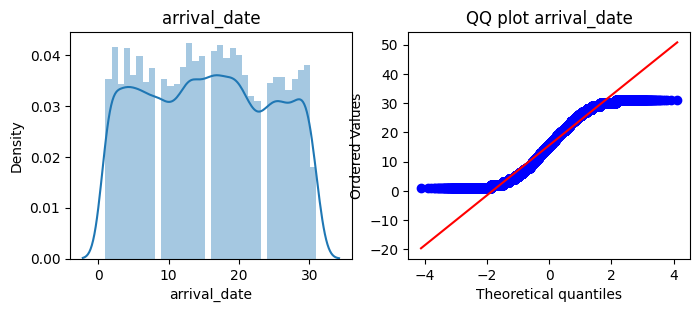

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


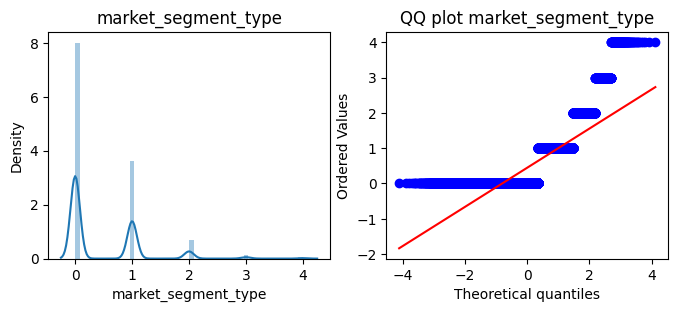

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


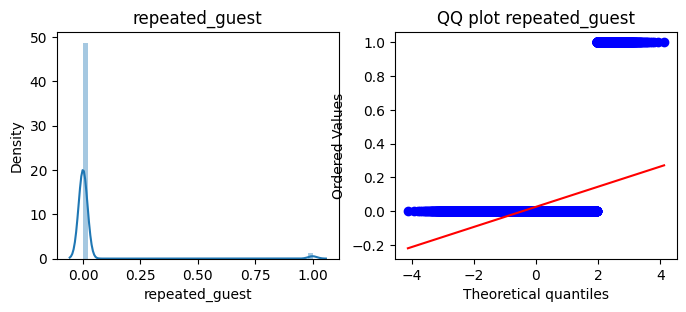

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


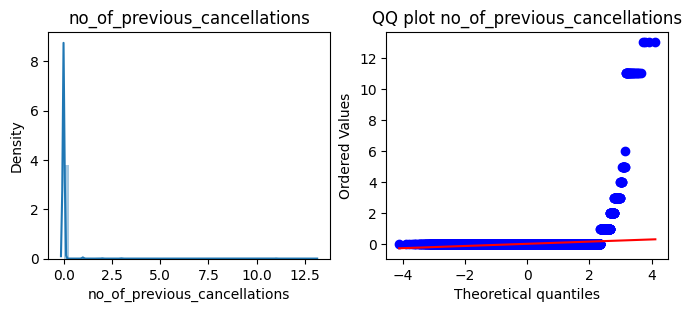

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


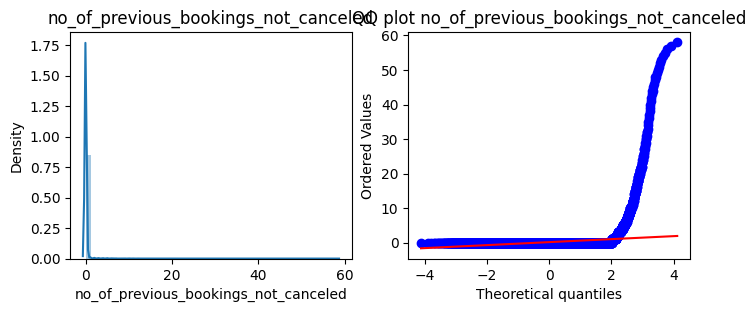

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


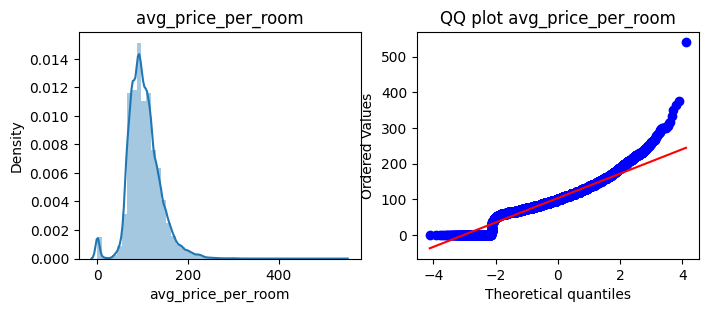

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


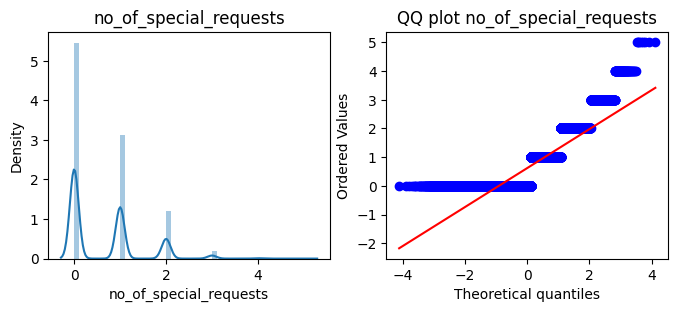

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


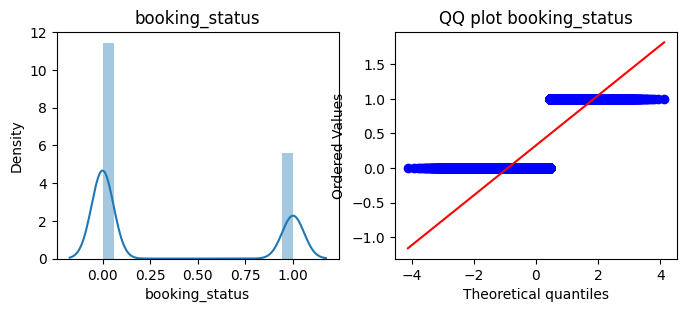

In [9]:
# Handling Numerical Variables
# Plotting distribution graph and QQ-Plot
for i in range(len(df.columns)):
  plt.figure(figsize=(8,3),dpi=100)
  plt.subplot(121)
  sns.distplot(df[df.columns[i]])
  plt.title(df.columns[i])
  plt.subplot(122)
  stats.probplot(df[df.columns[i]], dist="norm", plot=plt)
  plt.title('QQ plot '+df.columns[i])
  plt.show()

In [9]:
X = df.drop('booking_status',axis=1)
Y = df['booking_status']

In [10]:
X_cols=X.columns
y_cols="booking_status"

In [11]:
X.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
dtype: int64

## Without Dimensionality Reduction


In [13]:
pipeline = make_pipeline(
    KMeans(n_clusters=2, random_state=42)
)

# Fit the pipeline to the data
pipeline.fit(X)

# Get the labels and centroids
labels = pipeline.predict(X)
centroids = pipeline.named_steps['kmeans'].cluster_centers_

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### (Expectation Maximization 2 Cluster) vs (Kmeans 2  Cluster) vs for (booking_status vs Actual Stats)

In [14]:
df.groupby(by='booking_status').mean()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
booking_status,,,,,,,,,,,,,,,,,
0,1.813489,0.095982,0.773309,2.112710,0.496105,0.041410,0.686429,58.927224,2017.772325,7.447724,15.532144,0.512259,0.037474,0.032021,0.227101,99.931412,0.758549
1,1.909550,0.124358,0.887505,2.392259,0.555743,0.009592,0.754985,139.215482,2017.919142,7.374253,15.730080,0.314767,0.001346,0.005553,0.002188,110.589966,0.334623


In [15]:
pd.DataFrame(centroids,columns=X_cols)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,1.894926,0.085023,0.870617,2.511482,0.419066,0.019940,0.467122,212.512490,2017.897950,8.076621,15.646578,0.458833,0.001568,0.006945,0.001344,100.445846,0.501512
1,1.828653,0.111891,0.791173,2.104030,0.547170,0.034591,0.787809,43.685535,2017.795122,7.210509,15.580810,0.443872,0.033494,0.028704,0.203050,104.395525,0.658220


In [16]:
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gmm.fit(X)

pd.DataFrame(gmm.means_,columns=X_cols)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,1.619587,0.129344,0.584168,1.631737,0.304851,0.585731,0.813879,37.022475,2017.805998,7.263217,15.239413,1.031755,0.484635,0.441383,2.899996,94.433754,0.823764
1,1.857550,0.103935,0.823378,2.236281,0.527418,0.000000,0.703026,87.925348,2017.821233,7.432614,15.616968,0.414923,0.000000,0.000000,0.000000,103.925667,0.608255


### Finding optimal Clusters using k-elbow method for k mean

In [27]:
sns.set_style("whitegrid")

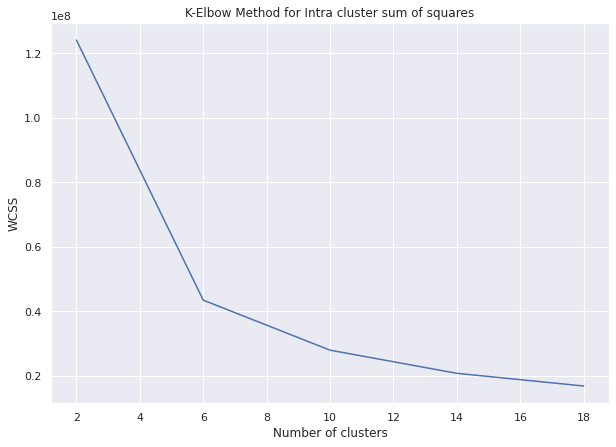

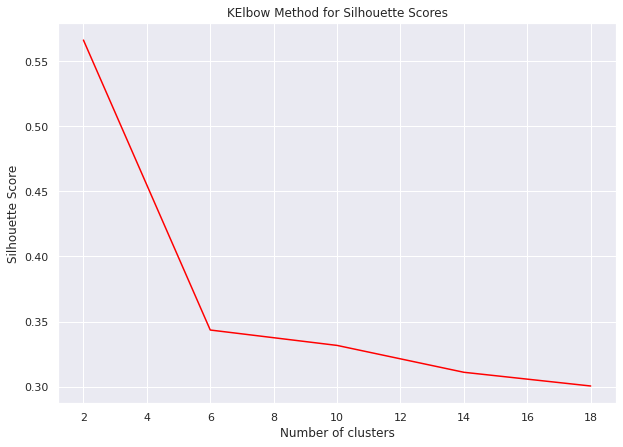

In [28]:

wcss = []
silhouette_scores = []
sns.set(rc={'figure.figsize':(10,7)});
max_clusters = 25
for i in range(2, 20,4):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    cluster_labels = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
# Plot the Elbow Method graph
plt.plot(range(2, 20,4), wcss)
plt.title('K-Elbow Method for Intra cluster sum of squares')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot the silhouette scores graph
plt.plot(range(2, 20,4), silhouette_scores, color='red')
plt.title('KElbow Method for Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


### Running K mean with optimal clusters

In [19]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)
cluster_labels = kmeans.fit_predict(X)

# Fit the kmeans to the data
kmeans.fit(X)

# Get the labels and centroids
labels = kmeans.predict(X)
cluster_labels = kmeans.predict(X)
score=silhouette_score(X, cluster_labels)
print("Running K mean with   optimal clusters ")
print("Intra cluster sum of squares",kmeans.inertia_)
print("Silhouette score",score)

Running K mean with   optimal clusters 
Intra cluster sum of squares 43463869.71011925
Silhouette score 0.34348809781083384


In [20]:
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids,columns=X_cols)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,1.881689,0.056794,0.853095,2.314795,0.556794,0.019019,0.533447,75.086175,2017.795383,7.240163,15.409627,0.393757,0.004460,3.672613e-03,0.024921,94.856081,0.614244
1,1.868505,0.098694,0.939623,2.564586,0.400871,0.022642,0.469956,202.395356,2017.907983,8.111176,15.672279,0.379681,0.001742,1.625544e-02,0.002903,100.053573,0.551814
2,1.647364,0.043386,0.721369,1.920352,0.630065,0.039130,0.366235,17.067068,2017.717946,7.065495,15.304440,0.706938,0.078908,6.965772e-02,0.491859,81.635204,0.545883
3,1.935417,0.118810,0.984560,2.557334,0.417436,0.027302,0.833930,133.376012,2017.890793,7.237432,15.545848,0.340049,0.000377,-6.938894e-17,0.000377,108.430787,0.611749
4,1.882005,0.018942,0.661800,2.342147,0.445146,0.003157,0.134570,300.847277,2017.921468,8.725730,15.859905,0.694554,0.002762,2.367798e-03,0.000395,94.075856,0.338990
5,2.028240,0.289727,0.757747,2.015265,0.446191,0.049611,1.724927,25.477026,2017.876507,7.513967,16.197985,0.109449,0.004274,6.105938e-04,0.006869,150.676365,0.898336


### Finding optimal Clusters using Expectation Maximization method for k mean

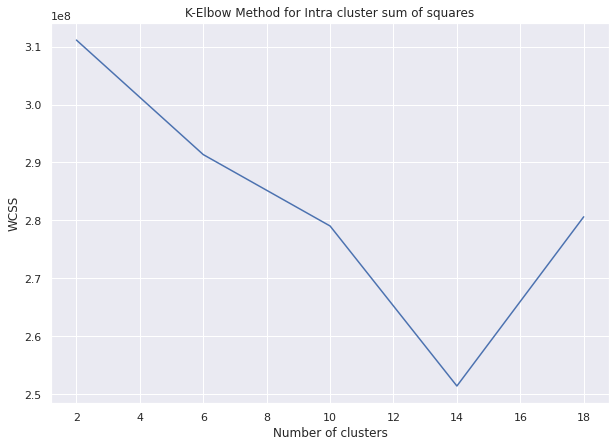

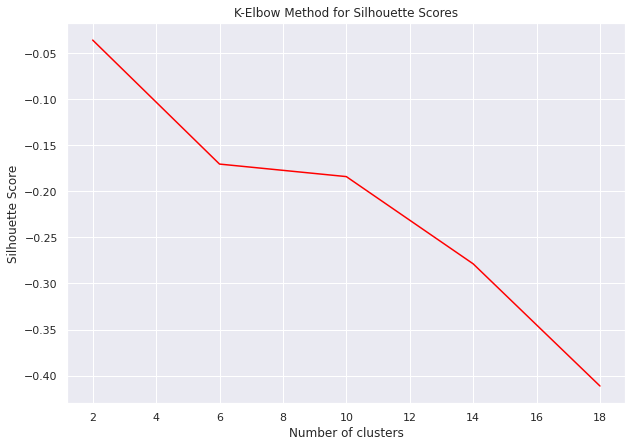

In [21]:

wcss = []
silhouette_scores = []
max_clusters = 10
for i in range(2, 20,4):
    gmm = GaussianMixture(n_components=i, covariance_type='full', random_state=0)
    gmm.fit(X)
    cluster_labels = gmm.predict(X)
    
    wcss_gmm = np.sum([np.sum((X[cluster_labels == j] - gmm.means_[j]) ** 2) for j in range(i)])
    wcss.append(wcss_gmm)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)


plt.plot(range(2, 20,4), wcss)
plt.title('K-Elbow Method for Intra cluster sum of squares')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

plt.plot(range(2, 20,4), silhouette_scores, color='red')
plt.title('K-Elbow Method for Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

### Running Expectation Maximization with optimal clusters

In [22]:
gmm = GaussianMixture(n_components=6, covariance_type='full', random_state=0)
gmm.fit(X)
cluster_labels = gmm.predict(X)
wcss_gmm = np.sum([np.sum((X[cluster_labels == j] - gmm.means_[j]) ** 2) for j in range(6)])
silhouette_avg = silhouette_score(X, cluster_labels)

print("Running Expectation Maximization with  optimal clusters ")
print("Intra cluster sum of squares",wcss_gmm)
print("Silhouette score",silhouette_avg)

Running Expectation Maximization with  optimal clusters 
Intra cluster sum of squares 291354747.2969607
Silhouette score -0.17037470809080227


In [23]:
centroids = gmm.means_
pd.DataFrame(centroids,columns=X_cols)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,1.230108,0.015054,0.450538,1.336559,0.108602,0.149462,0.486022,13.195699,2017.777419,7.430108,14.737634,1.866667,1.0,0.910753,5.983871,65.589516,0.562366
1,1.758458,0.000000,0.773840,2.165722,0.136637,0.000000,0.000000,101.600129,2017.758142,7.465369,15.390108,0.601900,0.0,0.000000,0.000000,95.502106,0.481317
2,1.925773,0.573272,0.831429,2.227736,0.148279,0.000000,1.433530,76.155626,2018.000000,6.962395,16.212064,0.426330,0.0,0.000000,0.000000,121.602556,0.841147
3,2.060943,0.000000,0.858798,2.242258,1.451239,0.000000,1.548761,66.083520,2017.927900,7.389833,15.813618,0.062273,0.0,0.000000,0.000000,110.539928,0.770194
4,1.795408,0.580101,0.866503,2.319320,0.446884,0.352453,1.777277,31.815125,2017.185801,9.224276,15.702450,0.742184,0.0,0.000000,0.000000,99.210191,0.912636
5,1.891028,1.034272,1.075650,2.744783,0.452627,0.353783,2.749989,75.286950,2018.000000,6.973169,16.332103,0.000000,0.0,0.000000,0.000000,148.727803,0.968114


## Dimensionality Reduction

### Distribution of eigenvalues

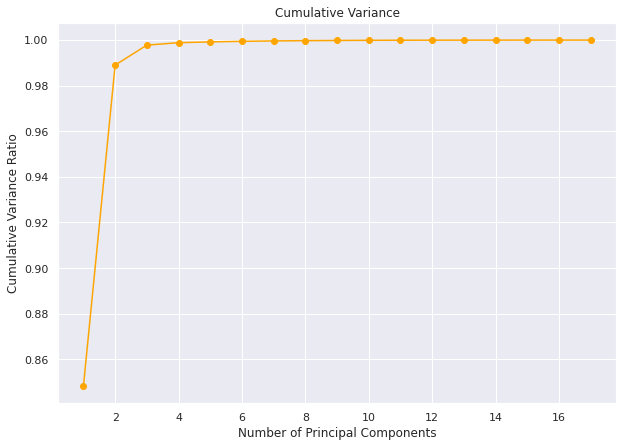

In [24]:

# Perform PCA on the data
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculate the cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o',color='orange')
plt.title('Cumulative Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.show()


### Reconstruction Error for PCA

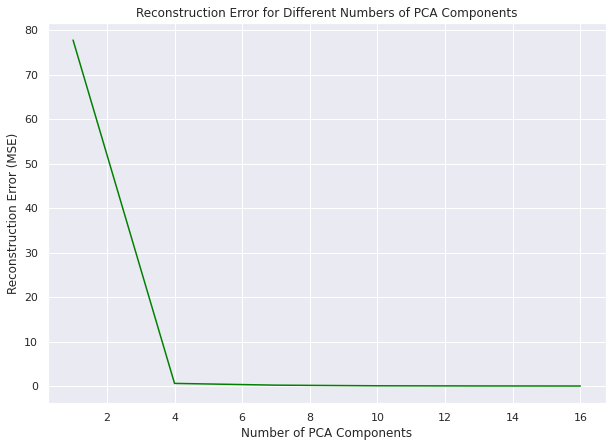

In [25]:


# Set the maximum number of PCA components
max_components = min(X.shape)

# Calculate reconstruction errors for different numbers of PCA components
reconstruction_errors = []
for n_components in range(1, max_components + 1,3):
    # Perform PCA with n_components
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # Reconstruct the dataset using the reduced representation
    X_reconstructed = pca.inverse_transform(X_pca)
    
    # Calculate the reconstruction error (mean squared error)
    reconstruction_error = mean_squared_error(X, X_reconstructed)
    reconstruction_errors.append(reconstruction_error)

# Plot the reconstruction errors for different numbers of PCA components
plt.plot(range(1, max_components + 1,3), reconstruction_errors,color='green')
plt.title('Reconstruction Error for Different Numbers of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Reconstruction Error (MSE)')
plt.show()


### PCA for k-Means with  Optimal Clusters


100%|█████████████████████████████████████████████| 6/6 [01:24<00:00, 14.22s/it]


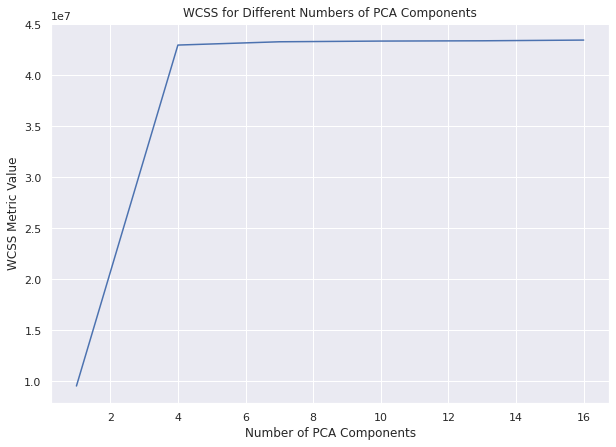

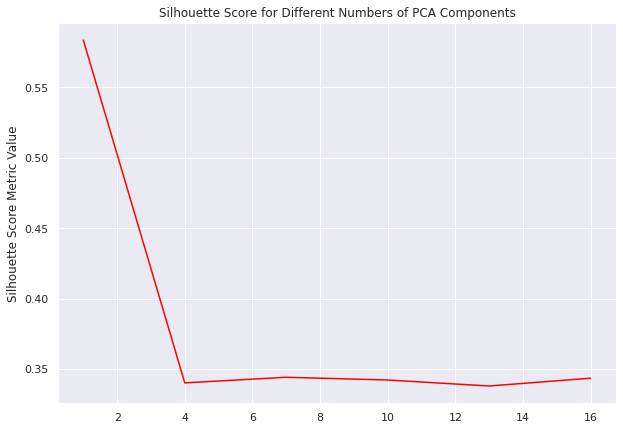

In [29]:

# Set the number of clusters for k-means
n_clusters = 6

# Calculate WCSS and silhouette scores for different numbers of PCA components
wcss = []
silhouette_scores = []
max_pca_components = min(X.shape)
for n_components in tqdm.tqdm(range(1, max_pca_components + 1,3)):
    # Perform PCA with n_components
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # Perform k-means clustering on the reduced data
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_pca)
    
    # Calculate WCSS and silhouette score
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot WCSS and silhouette scores for different numbers of PCA components
plt.plot(range(1, max_pca_components + 1,3), wcss, label='WCSS')
plt.xlabel('Number of PCA Components')
plt.ylabel('WCSS Metric Value')
plt.title('WCSS for Different Numbers of PCA Components')
plt.show()

plt.plot(range(1, max_pca_components + 1,3), silhouette_scores, label='Silhouette Score',color='red')
plt.title('Silhouette Score for Different Numbers of PCA Components')
plt.ylabel('Silhouette Score Metric Value')
plt.show()



### PCA for k-Means with 2d Data


100%|█████████████████████████████████████████████| 5/5 [01:10<00:00, 14.21s/it]


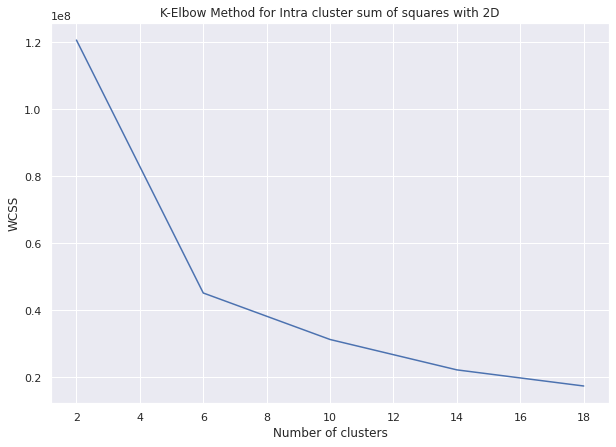

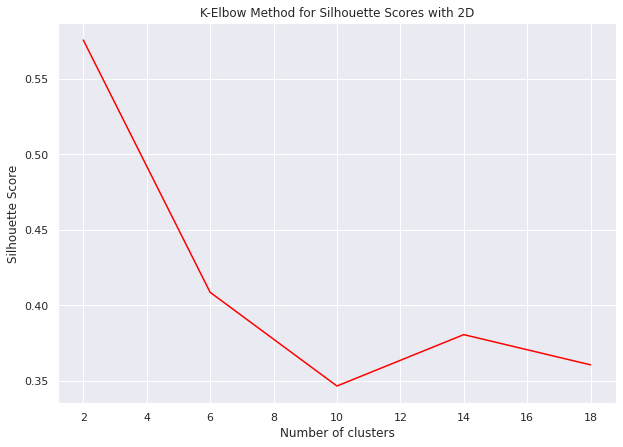

In [30]:

# Calculate WCSS and silhouette scores for different numbers of PCA components
wcss = []
silhouette_scores = []
max_pca_components = 15
for clusters in tqdm.tqdm(range(2, max_pca_components + 1,3)):
    # Perform PCA with n_components
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Perform k-means clustering on the reduced data
    kmeans = KMeans(n_clusters=clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_pca)
    
    # Calculate WCSS and silhouette score
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method graph
plt.plot(range(2, 20,4), wcss)
plt.title('K-Elbow Method for Intra cluster sum of squares with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot the silhouette scores graph
plt.plot(range(2, 20,4), silhouette_scores, color='red')
plt.title('K-Elbow Method for Silhouette Scores with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()



### Optimal  PCA with 2 Components for k-Means with   Optimal Clusters

In [31]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
# Fit the kmeans to the data
kmeans.fit(X_pca)

# Get the labels and centroids
labels = kmeans.predict(X_pca)
cluster_labels = kmeans.predict(X_pca)
score=silhouette_score(X_pca, cluster_labels)
print("Running K mean with optimal clusters ")
print("Intra cluster sum of squares",kmeans.inertia_)
print("Silhouette score",score)

Running K mean with optimal clusters 
Intra cluster sum of squares 59318570.67005484
Silhouette score 0.4013488516173068


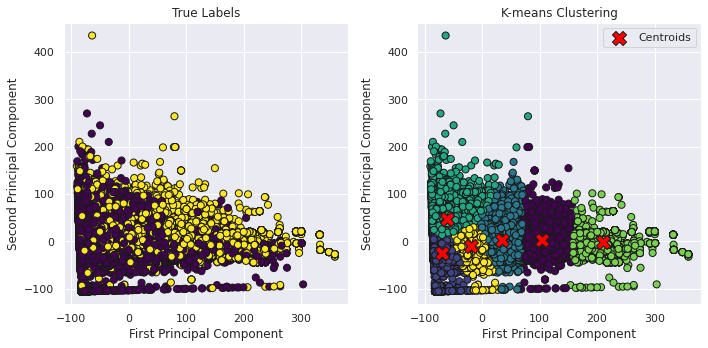

In [32]:

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform k-means clustering on the PCA-reduced data
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels = kmeans.fit_predict(X_pca)

# Visualize the PCA-reduced data and k-means clustering results
plt.figure(figsize=(10, 5))

# Plot the true labels
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50)
plt.title('True Labels')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Plot the k-means clustering results
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', edgecolor='k', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.tight_layout()
plt.show()


### PCA for Expectation Maximization with   Optimal Clusters


100%|█████████████████████████████████████████████| 6/6 [01:15<00:00, 12.48s/it]


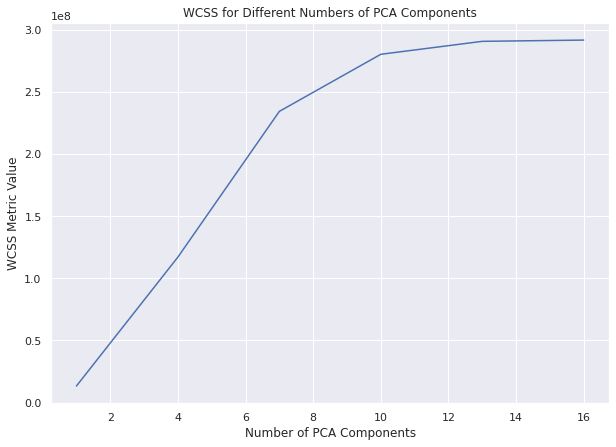

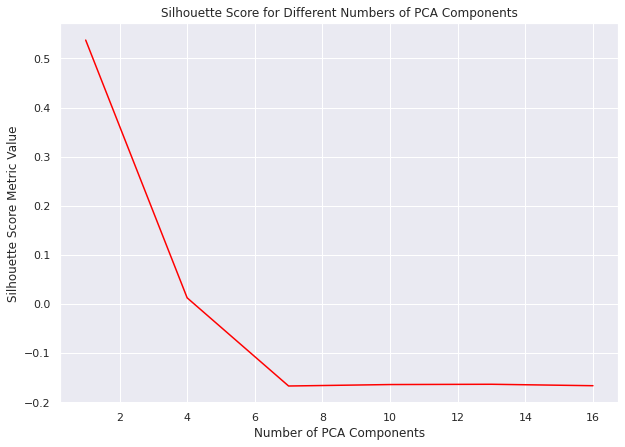

In [33]:

# Set the number of components (clusters) for GMM
n_components = 6

# Calculate WCSS and silhouette scores for different numbers of PCA components
wcss = []
silhouette_scores = []
max_pca_components = min(X.shape)
for n_pca_components in tqdm.tqdm(range(1, max_pca_components + 1,3)):
    # Perform PCA with n_pca_components
    pca = PCA(n_components=n_pca_components)
    X_pca = pca.fit_transform(X)
    
    # Perform Expectation Maximization clustering using GMM on the reduced data
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
    gmm.fit(X_pca)
    cluster_labels = gmm.predict(X_pca)
    
    # Calculate WCSS for GMM
    wcss_gmm = np.sum([np.sum((X_pca[cluster_labels == j] - gmm.means_[j]) ** 2) for j in range(n_components)])
    wcss.append(wcss_gmm)
    
    # Calculate silhouette score for GMM
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot WCSS and silhouette scores for different numbers of PCA components
plt.plot(range(1, max_pca_components + 1,3), wcss, label='WCSS')
plt.xlabel('Number of PCA Components')
plt.ylabel('WCSS Metric Value')
plt.title('WCSS for Different Numbers of PCA Components')
plt.show()

plt.plot(range(1, max_pca_components + 1,3), silhouette_scores, label='Silhouette Score',color='red')
plt.title('Silhouette Score for Different Numbers of PCA Components')
plt.xlabel('Number of PCA Components')

plt.ylabel('Silhouette Score Metric Value')
plt.show()

### PCA for Expectation Maximization 2d Data


100%|█████████████████████████████████████████████| 5/5 [00:57<00:00, 11.69s/it]


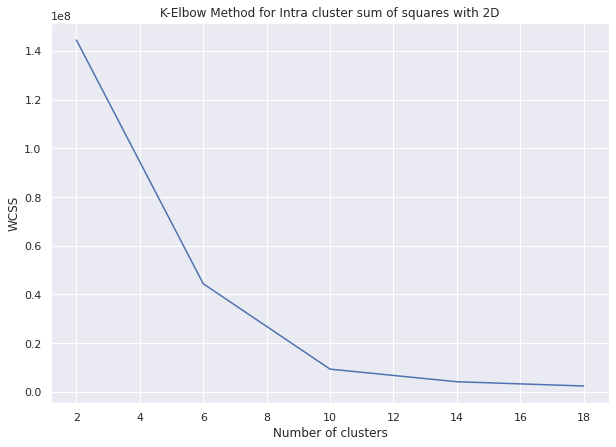

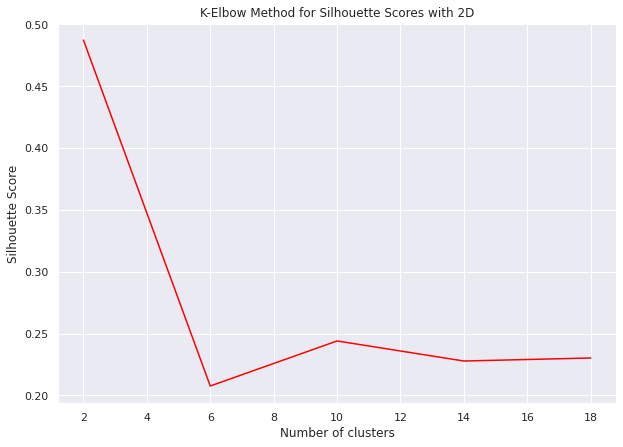

In [34]:

# Calculate WCSS and silhouette scores for different numbers of PCA components
wcss = []
silhouette_scores = []
total_cluster = 15
for cluster in tqdm.tqdm(range(2, total_cluster + 1,3)):
    # Perform PCA with n_pca_components
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Perform Expectation Maximization clustering using GMM on the reduced data
    gmm = GaussianMixture(n_components=cluster, covariance_type='full', random_state=0)
    gmm.fit(X_pca)
    cluster_labels = gmm.predict(X_pca)
    
    # Calculate WCSS for GMM
    wcss_gmm = np.sum([np.sum((X_pca[cluster_labels == j] - gmm.means_[j]) ** 2) for j in range(2)])
    wcss.append(wcss_gmm)
    
    # Calculate silhouette score for GMM
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method graph
plt.plot(range(2, 20,4), wcss)
plt.title('K-Elbow Method for Intra cluster sum of squares with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot the silhouette scores graph
plt.plot(range(2, 20,4), silhouette_scores, color='red')
plt.title('K-Elbow Method for Silhouette Scores with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()



### Optimal  Expectation Maximization  with 2 Components for k-Means with   Optimal Clusters

In [35]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gmm.fit(X_pca)
cluster_labels = gmm.predict(X_pca)
wcss_gmm = np.sum([np.sum((X_pca[cluster_labels == j] - gmm.means_[j]) ** 2) for j in range(2)])
silhouette_avg = silhouette_score(X_pca, cluster_labels)

print("Running Expectation Maximization with   optimal clusters ")
print("Intra cluster sum of squares",wcss_gmm)
print("Silhouette score",silhouette_avg)

Running Expectation Maximization with   optimal clusters 
Intra cluster sum of squares 144517529.4221642
Silhouette score 0.4872490613442544


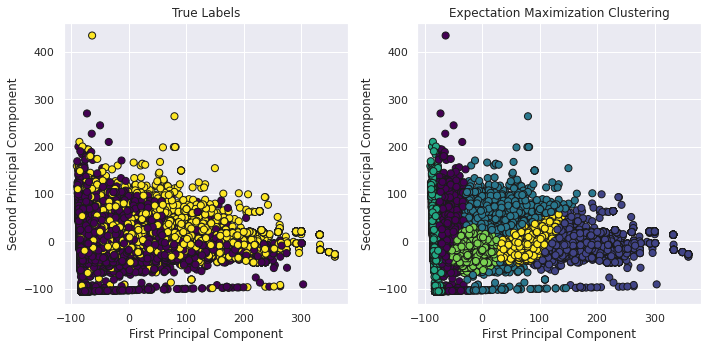

In [36]:

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform Expectation Maximization clustering using GMM on the PCA-reduced data
n_components = 6
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
gmm_labels = gmm.fit_predict(X_pca)

# Visualize the PCA-reduced data and Expectation Maximization clustering results
plt.figure(figsize=(10, 5))

# Plot the true labels
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50)
plt.title('True Labels')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Plot the Expectation Maximization clustering results
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('Expectation Maximization Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.tight_layout()
plt.show()


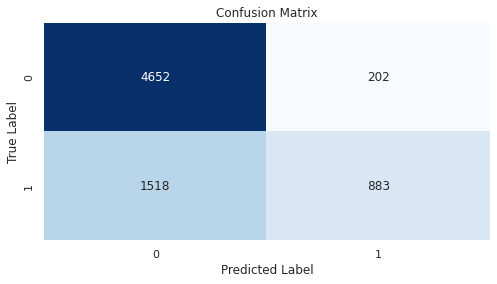

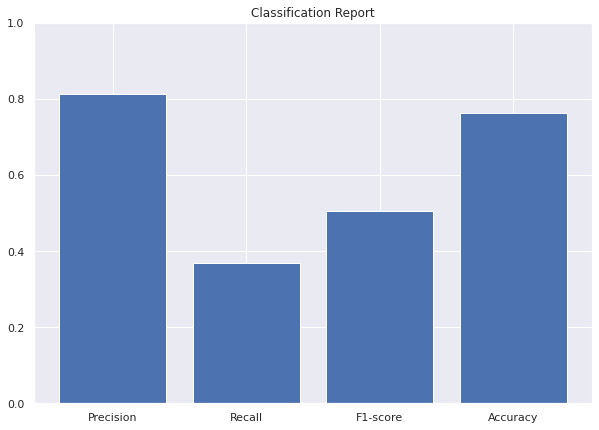

In [37]:

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=0)

# Instantiate a simple feed-forward neural network
clf = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=0)

# Train the neural network on the training set
clf.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = clf.predict(X_test)

# Compute classification metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
metrics = [precision, recall, f1, accuracy]

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the classification report
labels = ['Precision', 'Recall', 'F1-score', 'Accuracy']
plt.bar(labels, metrics)
plt.title('Classification Report')
plt.ylim(0, 1)
plt.show()


# ICA


### MSE between the original dataset & the reconstructed dataset

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy

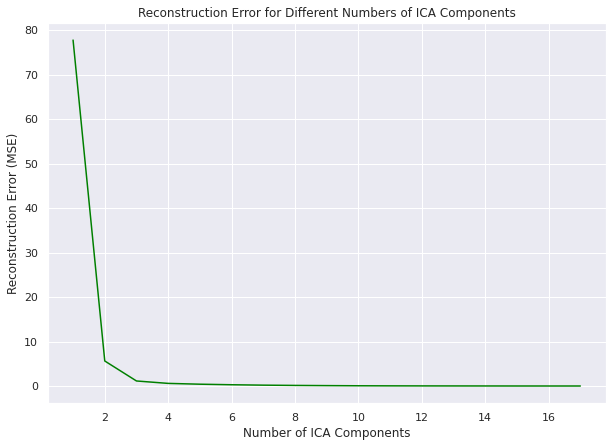

In [38]:

# Calculate reconstruction errors for different numbers of ICA components
reconstruction_errors = []
for n_components in range(1, max_components + 1):
    # Perform ICA with n_components
    ica = FastICA(n_components=n_components, random_state=0)
    X_ica = ica.fit_transform(X)
    
    # Reconstruct the dataset using the independent components
    X_reconstructed = ica.inverse_transform(X_ica)
    
    # Calculate the reconstruction error (mean squared error)
    reconstruction_error = mean_squared_error(X, X_reconstructed)
    reconstruction_errors.append(reconstruction_error)

# Plot the reconstruction errors for different numbers of ICA components
plt.plot(range(1, max_components + 1), reconstruction_errors,color='green')
plt.title('Reconstruction Error for Different Numbers of ICA Components')
plt.xlabel('Number of ICA Components')
plt.ylabel('Reconstruction Error (MSE)')
plt.show()


### ICA for k-means with   Optimal Clusters


  0%|                                                     | 0/6 [00:00<?, ?it/s]/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(

 17%|███████▌                                     | 1/6 [00:11<00:57, 11.46s/it]/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(

 33%|███████████████                              | 2/6 [00:26<00:49, 12.48s/it]/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(

 50%|██████████████████████▌                      | 3/6 [00:43<00:41, 13.85s/it]/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastic

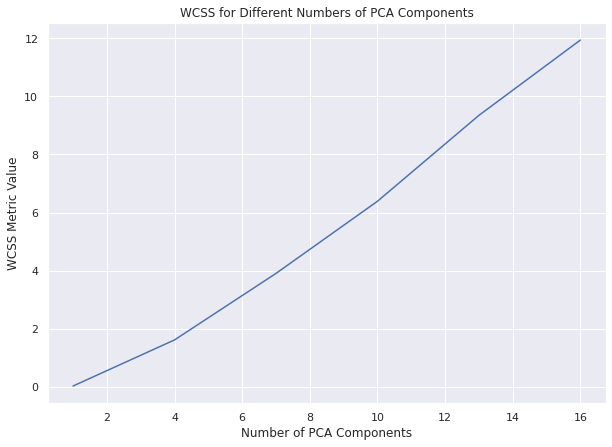

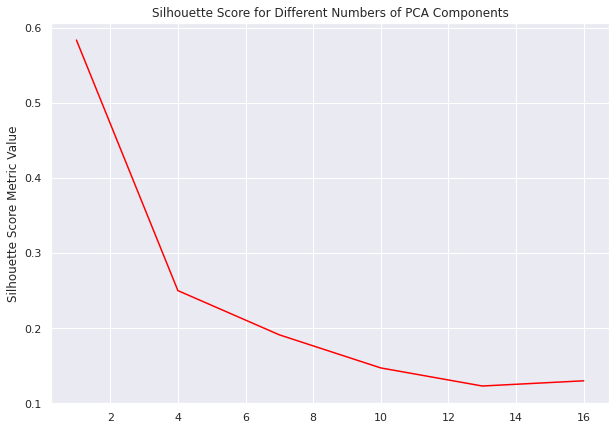

In [39]:

# Set the number of clusters for k-means
n_clusters = 6
# Calculate WCSS and silhouette scores for different numbers of ICA components
wcss = []
silhouette_scores = []
max_ica_components = min(X.shape)
for n_components in tqdm.tqdm(range(1, max_pca_components + 1,3)):
    # Perform ICA with n_components
    ica = FastICA(n_components=n_components, random_state=0)
    X_ica = ica.fit_transform(X)
    
    # Perform k-means clustering on the transformed data
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_ica)
    
    # Calculate WCSS and silhouette score
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_ica, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot WCSS and silhouette scores for different numbers of ICA components
plt.plot(range(1, max_pca_components + 1,3), wcss, label='WCSS')
plt.xlabel('Number of PCA Components')
plt.ylabel('WCSS Metric Value')
plt.title('WCSS for Different Numbers of PCA Components')
plt.show()

plt.plot(range(1, max_pca_components + 1,3), silhouette_scores, label='Silhouette Score',color='red')
plt.title('Silhouette Score for Different Numbers of PCA Components')
plt.ylabel('Silhouette Score Metric Value')
plt.show()

### ICA for k-means with 2d Data


  0%|                                                     | 0/5 [00:00<?, ?it/s]/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(

 20%|█████████                                    | 1/5 [00:14<00:56, 14.01s/it]/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(

 40%|██████████████████                           | 2/5 [00:27<00:41, 14.00s/it]/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(

 60%|███████████████████████████                  | 3/5 [00:42<00:28, 14.22s/it]/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastic

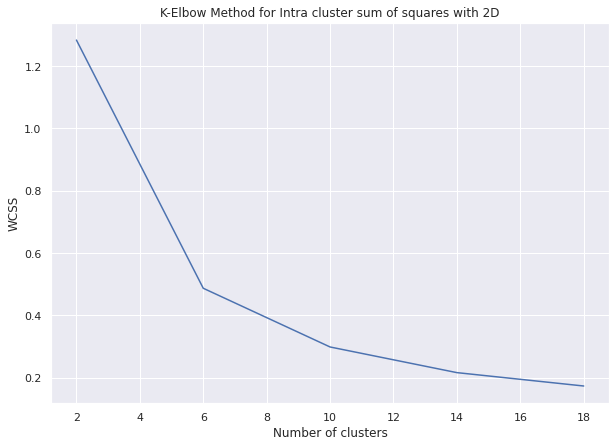

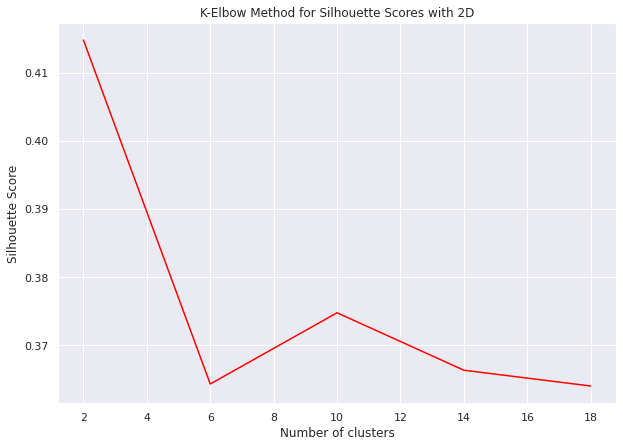

In [40]:

# Calculate WCSS and silhouette scores for different numbers of ICA components
wcss = []
silhouette_scores = []
n_clusterss = 15
for n_clusters in tqdm.tqdm(range(2, n_clusterss + 1,3)):
    # Perform ICA with n_components
    ica = FastICA(n_components=2, random_state=0)
    X_ica = ica.fit_transform(X)
    
    # Perform k-means clustering on the transformed data
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_ica)
    
    # Calculate WCSS and silhouette score
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_ica, cluster_labels)
    silhouette_scores.append(silhouette_avg)
# Plot the Elbow Method graph
plt.plot(range(2, 20,4), wcss)
plt.title('K-Elbow Method for Intra cluster sum of squares with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot the silhouette scores graph
plt.plot(range(2, 20,4), silhouette_scores, color='red')
plt.title('K-Elbow Method for Silhouette Scores with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

### PCA in 2d

In [41]:
ica = FastICA(n_components=2, random_state=0)
X_ica = ica.fit_transform(X)


kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
# Fit the kmeans to the data
kmeans.fit(X_ica)

# Get the labels and centroids
labels = kmeans.predict(X_ica)
cluster_labels = kmeans.predict(X_ica)
score=silhouette_score(X_ica, cluster_labels)
print("Running K mean with  optimal clusters ")
print("Intra cluster sum of squares",kmeans.inertia_)
print("Silhouette score",score)

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Running K mean with  optimal clusters 
Intra cluster sum of squares 0.6043972818858449
Silhouette score 0.36552041617001146


/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


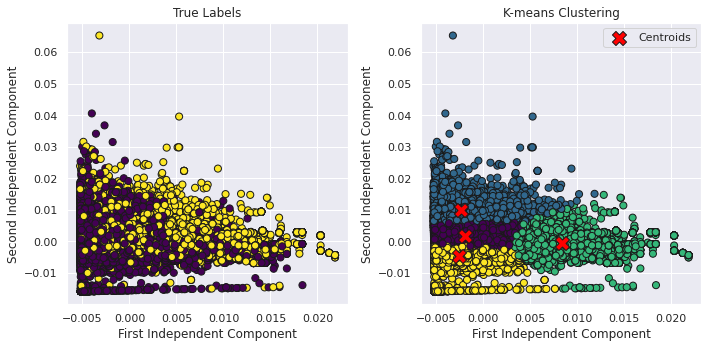

In [42]:

# Apply ICA with 2 components
ica = FastICA(n_components=2, random_state=0)
X_ica = ica.fit_transform(X)

# Perform k-means clustering on the ICA-transformed data
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels = kmeans.fit_predict(X_ica)

# Visualize the ICA-transformed data and k-means clustering results
plt.figure(figsize=(10, 5))

# Plot the true labels
plt.subplot(1, 2, 1)
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50)
plt.title('True Labels')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')

# Plot the k-means clustering results
plt.subplot(1, 2, 2)
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', edgecolor='k', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')
plt.legend()

plt.tight_layout()
plt.show()


### ICA for Expectation Maximization with   Optimal Clusters

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy

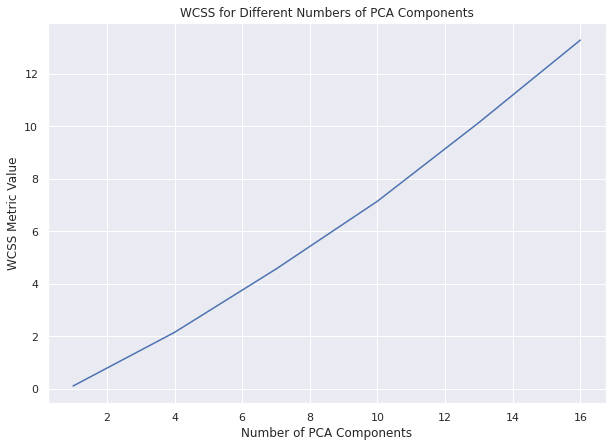

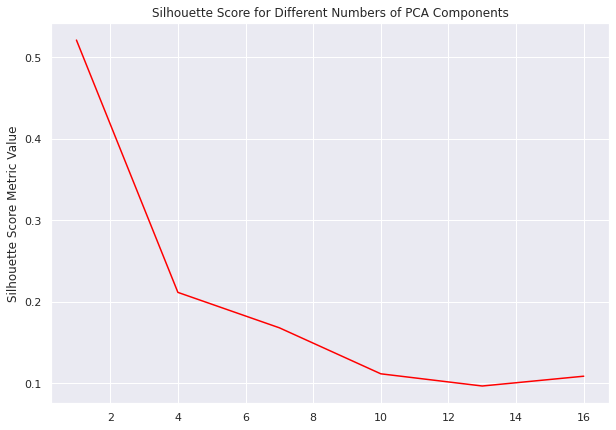

In [43]:

# Set the number of components (clusters) for GMM
n_components = 6

# Calculate WCSS and silhouette scores for different numbers of ICA components
wcss = []
silhouette_scores = []
max_ica_components = min(X.shape)
for n_ica_components in range(1, max_pca_components + 1,3):
    # Perform ICA with n_ica_components
    ica = FastICA(n_components=n_ica_components, random_state=0)
    X_ica = ica.fit_transform(X)
    
    # Perform Expectation Maximization clustering using GMM on the transformed data
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
    gmm.fit(X_ica)
    cluster_labels = gmm.predict(X_ica)
    
    # Calculate WCSS for GMM
    wcss_gmm = np.sum([np.sum((X_ica[cluster_labels == j] - gmm.means_[j]) ** 2) for j in range(n_components)])
    wcss.append(wcss_gmm)
    
    # Calculate silhouette score for GMM
    silhouette_avg = silhouette_score(X_ica, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot WCSS and silhouette scores for different numbers of ICA components
plt.plot(range(1, max_pca_components + 1,3), wcss, label='WCSS')
plt.xlabel('Number of PCA Components')
plt.ylabel('WCSS Metric Value')
plt.title('WCSS for Different Numbers of PCA Components')
plt.show()

plt.plot(range(1, max_pca_components + 1,3), silhouette_scores, label='Silhouette Score',color='red')
plt.title('Silhouette Score for Different Numbers of PCA Components')
plt.ylabel('Silhouette Score Metric Value')
plt.show()

### ICA for Expectation Maximization with 2d Data

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


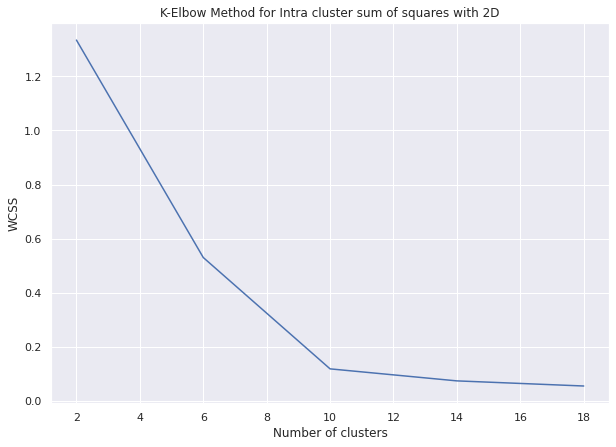

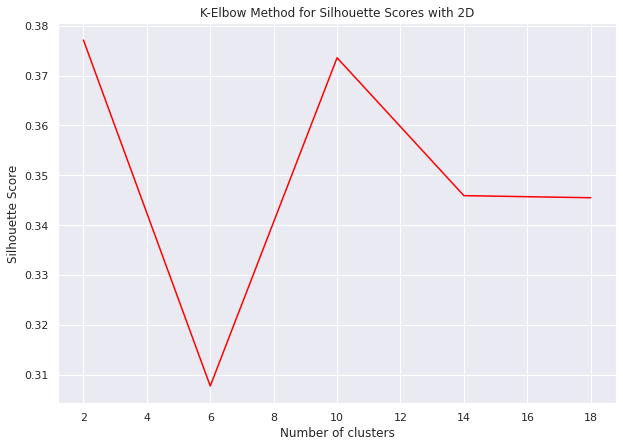

In [44]:

# Set the number of components (clusters) for GMM
n_components = 6

# Calculate WCSS and silhouette scores for different numbers of ICA components
wcss = []
silhouette_scores = []
nclusters = 15
for clusters in range(2, nclusters + 1,3):
    # Perform ICA with n_ica_components
    ica = FastICA(n_components=2, random_state=0)
    X_ica = ica.fit_transform(X)
    
    # Perform Expectation Maximization clustering using GMM on the transformed data
    gmm = GaussianMixture(n_components=clusters, covariance_type='full', random_state=0)
    gmm.fit(X_ica)
    cluster_labels = gmm.predict(X_ica)
    
    # Calculate WCSS for GMM
    wcss_gmm = np.sum([np.sum((X_ica[cluster_labels == j] - gmm.means_[j]) ** 2) for j in range(2)])
    wcss.append(wcss_gmm)
    
    # Calculate silhouette score for GMM
    silhouette_avg = silhouette_score(X_ica, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method graph
plt.plot(range(2, 20,4), wcss)
plt.title('K-Elbow Method for Intra cluster sum of squares with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot the silhouette scores graph
plt.plot(range(2, 20,4), silhouette_scores, color='red')
plt.title('K-Elbow Method for Silhouette Scores with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

### ICA in 2d data

In [45]:
ica = FastICA(n_components=2, random_state=0)
X_ica = ica.fit_transform(X)
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gmm.fit(X_ica)
cluster_labels = gmm.predict(X_ica)
wcss_gmm = np.sum([np.sum((X_ica[cluster_labels == j] - gmm.means_[j]) ** 2) for j in range(2)])
silhouette_avg = silhouette_score(X_ica, cluster_labels)

print("Running Expectation Maximization with   optimal clusters ")
print("Intra cluster sum of squares",wcss_gmm)
print("Silhouette score",silhouette_avg)

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Running Expectation Maximization with   optimal clusters 
Intra cluster sum of squares 1.334711169350801
Silhouette score 0.37713057353023416


/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


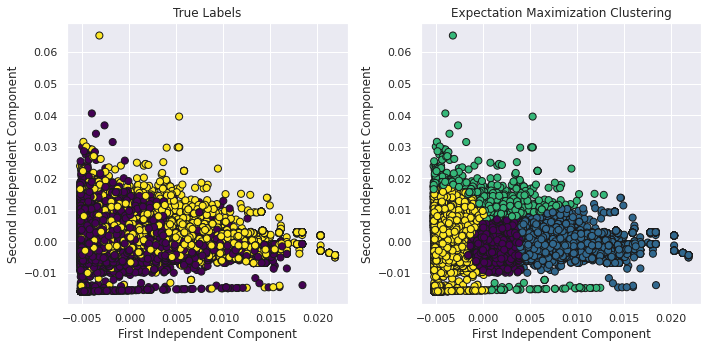

In [46]:

# Apply ICA with 2 components
ica = FastICA(n_components=2, random_state=0)
X_ica = ica.fit_transform(X)

# Perform Expectation Maximization clustering using GMM on the ICA-transformed data
n_components = 4
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
gmm_labels = gmm.fit_predict(X_ica)

# Visualize the ICA-transformed data and Expectation Maximization clustering results
plt.figure(figsize=(10, 5))

# Plot the true labels
plt.subplot(1, 2, 1)
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50)
plt.title('True Labels')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')

# Plot the Expectation Maximization clustering results
plt.subplot(1, 2, 2)
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=gmm_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('Expectation Maximization Clustering')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')

plt.tight_layout()
plt.show()


/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


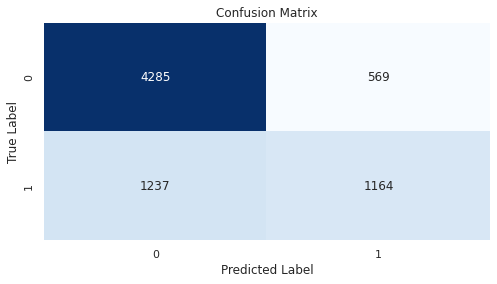

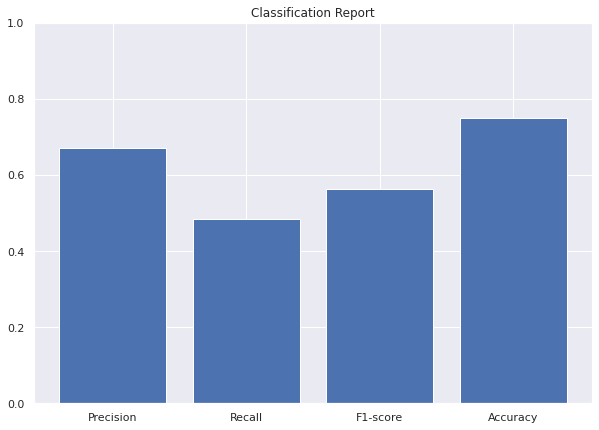

In [47]:

# Apply PCA with 2 components
ica = FastICA(n_components=2, random_state=0)
X_ica = ica.fit_transform(X)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ica, Y, test_size=0.2, random_state=0)

# Instantiate a simple feed-forward neural network
clf = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=0)

# Train the neural network on the training set
clf.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = clf.predict(X_test)

# Compute classification metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
metrics = [precision, recall, f1, accuracy]

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the classification report
labels = ['Precision', 'Recall', 'F1-score', 'Accuracy']
plt.bar(labels, metrics)
plt.title('Classification Report')
plt.ylim(0, 1)
plt.show()


# GaussianRandomProjection

### Reconstruction Error for GaussianRandomProjection

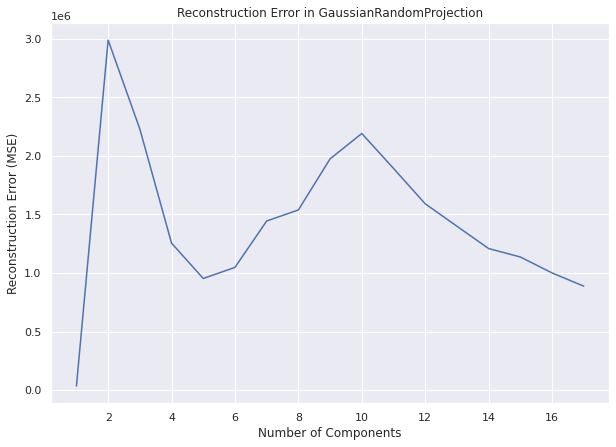

In [48]:

# Set the maximum number of components for GaussianRandomProjection
max_components = min(X.shape)

# Calculate reconstruction errors for different numbers of components
reconstruction_errors = []
for n_components in range(1, max_components + 1):
    # Perform GaussianRandomProjection with n_components
    grp = GaussianRandomProjection(n_components=n_components, random_state=0)
    X_grp = grp.fit_transform(X)
    
    # Reconstruct the dataset using the random components
    X_reconstructed = np.dot(X_grp, grp.components_) + np.mean(np.array(X), axis=0)
    
    # Calculate the reconstruction error (mean squared error)
    reconstruction_error = mean_squared_error(X, X_reconstructed)
    reconstruction_errors.append(reconstruction_error)

# Plot the reconstruction errors for different numbers of components
plt.plot(range(1, max_components + 1), reconstruction_errors)
plt.title('Reconstruction Error in GaussianRandomProjection')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error (MSE)')
plt.show()


### Randomized Projections for k-Mean with  Optimal Clusters

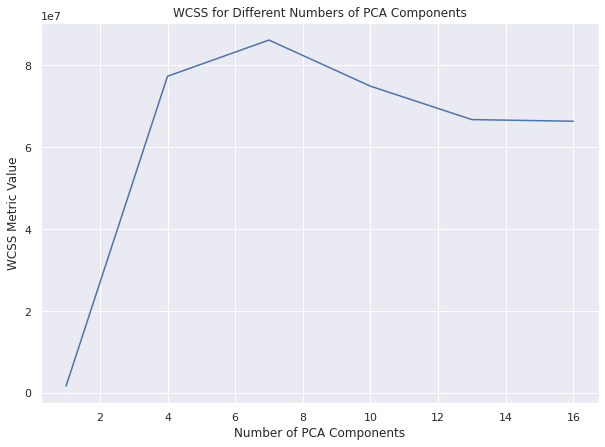

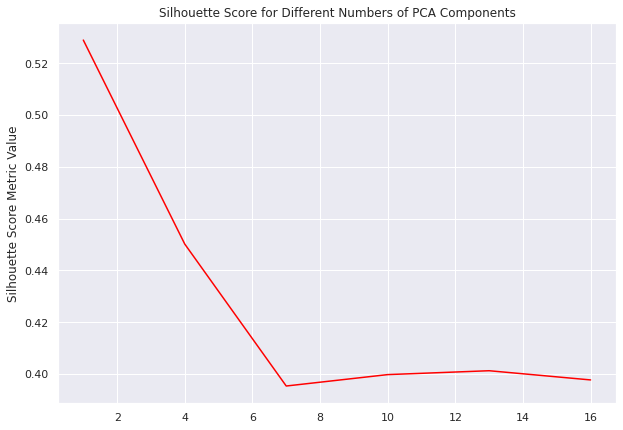

In [49]:


# Set the number of clusters for k-means
n_clusters = 4

# Calculate WCSS and silhouette scores for different numbers of JL components
wcss = []
silhouette_scores = []
max_jl_components = min(X.shape)
for n_components in range(1, max_pca_components + 1,3):
    # Perform JL transformation with n_components
    rp = GaussianRandomProjection(n_components=n_components, random_state=0)
    X_rp = rp.fit_transform(X)
    
    # Perform k-means clustering on the reduced data
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_rp)
    
    # Calculate WCSS and silhouette score
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_rp, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot WCSS and silhouette scores for different numbers of ICA components
plt.plot(range(1, max_pca_components + 1,3), wcss, label='WCSS')
plt.xlabel('Number of PCA Components')
plt.ylabel('WCSS Metric Value')
plt.title('WCSS for Different Numbers of PCA Components')
plt.show()

plt.plot(range(1, max_pca_components + 1,3), silhouette_scores, label='Silhouette Score',color='red')
plt.title('Silhouette Score for Different Numbers of PCA Components')
plt.ylabel('Silhouette Score Metric Value')
plt.show()

### Randomized Projections  for k-means clustering with 2d Data

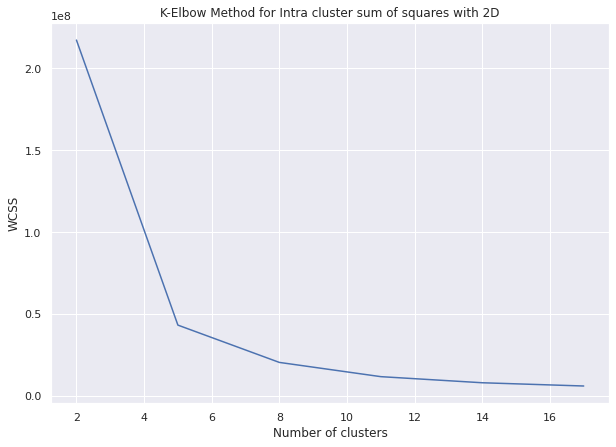

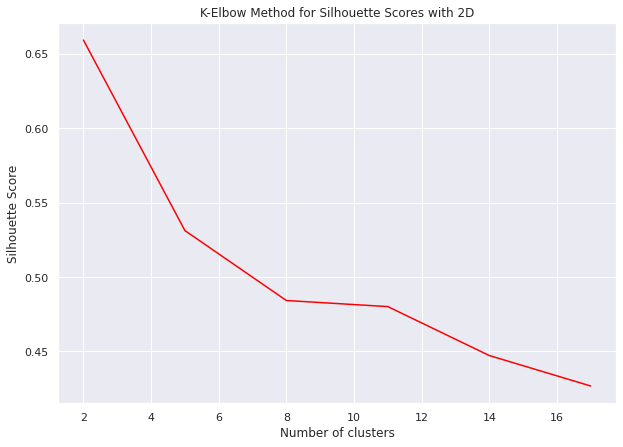

In [50]:


# Set the number of clusters for k-means
n_clusters = 4

# Calculate WCSS and silhouette scores for different numbers of JL components
wcss = []
silhouette_scores = []
clusters = min(X.shape)
for clusters_ in range(2, clusters + 1,3):
    # Perform JL transformation with n_components
    rp = GaussianRandomProjection(n_components=2, random_state=0)
    X_rp = rp.fit_transform(X)
    
    # Perform k-means clustering on the reduced data
    kmeans = KMeans(n_clusters=clusters_, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_rp)
    
    # Calculate WCSS and silhouette score
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_rp, cluster_labels)
    silhouette_scores.append(silhouette_avg)
# Plot the Elbow Method graph
plt.plot(range(2, clusters + 1,3), wcss)
plt.title('K-Elbow Method for Intra cluster sum of squares with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot the silhouette scores graph
plt.plot(range(2, clusters + 1,3), silhouette_scores, color='red')
plt.title('K-Elbow Method for Silhouette Scores with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

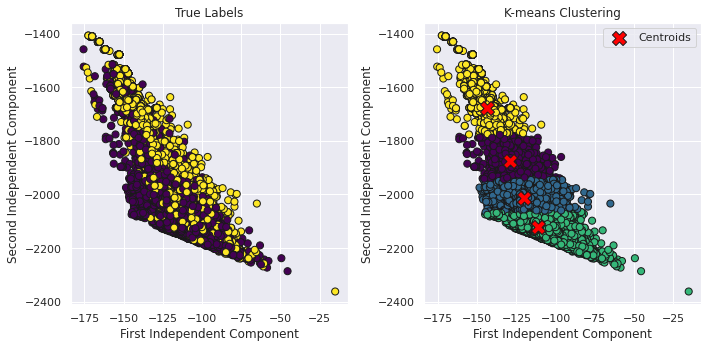

In [51]:
rp = GaussianRandomProjection(n_components=2, random_state=0)
X_rp = rp.fit_transform(X)
    
    # Perform k-means clustering on the reduced data
kmeans = KMeans(n_clusters=clusters_, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_rp)

# Perform k-means clustering on the ICA-transformed data
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels = kmeans.fit_predict(X_rp)

# Visualize the ICA-transformed data and k-means clustering results
plt.figure(figsize=(10, 5))

# Plot the true labels
plt.subplot(1, 2, 1)
plt.scatter(X_rp[:, 0], X_rp[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50)
plt.title('True Labels')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')

# Plot the k-means clustering results
plt.subplot(1, 2, 2)
plt.scatter(X_rp[:, 0], X_rp[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', edgecolor='k', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')
plt.legend()

plt.tight_layout()
plt.show()


### Randomized Projections for Expectation Maximization with  Optimal Clusters

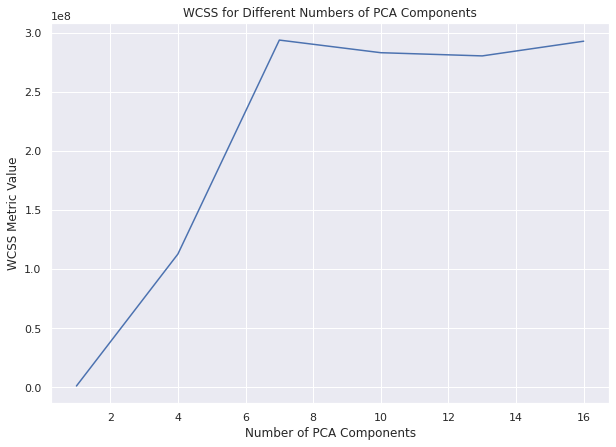

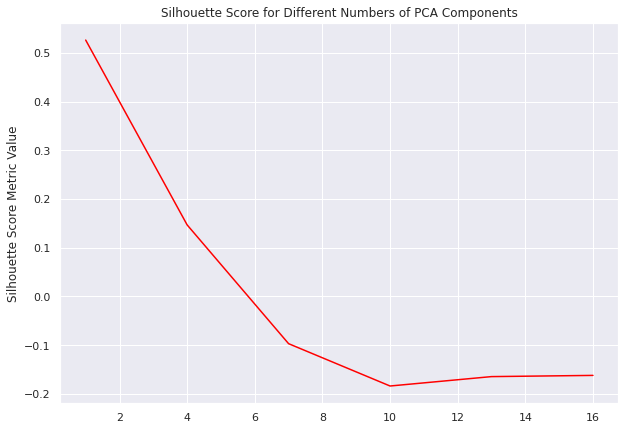

In [52]:


# Set the number of components (clusters) for GMM
n_components = 6

# Calculate WCSS and silhouette scores for different numbers of GRP components
wcss = []
silhouette_scores = []
max_grp_components = min(X.shape)
for n_grp_components in range(1, max_pca_components + 1,3):
    # Perform GRP with n_grp_components
    grp = GaussianRandomProjection(n_components=n_grp_components, random_state=0)
    X_grp = grp.fit_transform(X)
    
    # Perform Expectation Maximization clustering using GMM on the reduced data
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
    gmm.fit(X_grp)
    cluster_labels = gmm.predict(X_grp)
    
    # Calculate WCSS for GMM
    wcss_gmm = np.sum([np.sum((X_grp[cluster_labels == j] - gmm.means_[j]) ** 2) for j in range(n_components)])
    wcss.append(wcss_gmm)
    
    # Calculate silhouette score for GMM
    silhouette_avg = silhouette_score(X_grp, cluster_labels)
    silhouette_scores.append(silhouette_avg)


# Plot WCSS and silhouette scores for different numbers of ICA components
plt.plot(range(1, max_pca_components + 1,3), wcss, label='WCSS')
plt.xlabel('Number of PCA Components')
plt.ylabel('WCSS Metric Value')
plt.title('WCSS for Different Numbers of PCA Components')
plt.show()

plt.plot(range(1, max_pca_components + 1,3), silhouette_scores, label='Silhouette Score',color='red')
plt.title('Silhouette Score for Different Numbers of PCA Components')
plt.ylabel('Silhouette Score Metric Value')
plt.show()

### Randomized Projections for Expectation Maximization clustering with 2d Data

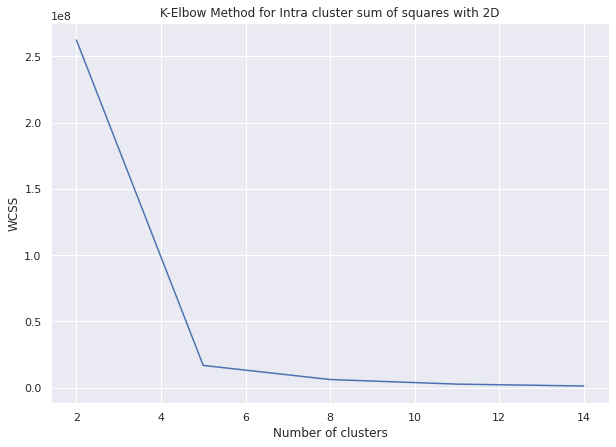

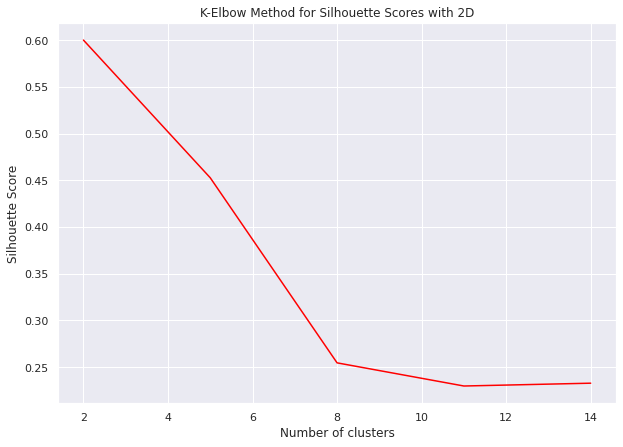

In [53]:


# Set the number of components (clusters) for GMM
n_components = 2

# Calculate WCSS and silhouette scores for different numbers of GRP components
wcss = []
silhouette_scores = []
clusters = 15
for cluster in range(2, clusters + 1,3):
    # Perform GRP with n_grp_components
    grp = GaussianRandomProjection(n_components=2, random_state=0)
    X_grp = grp.fit_transform(X)
    
    # Perform Expectation Maximization clustering using GMM on the reduced data
    gmm = GaussianMixture(n_components=cluster, covariance_type='full', random_state=0)
    gmm.fit(X_grp)
    cluster_labels = gmm.predict(X_grp)
    
    # Calculate WCSS for GMM
    wcss_gmm = np.sum([np.sum((X_grp[cluster_labels == j] - gmm.means_[j]) ** 2) for j in range(2)])
    wcss.append(wcss_gmm)
    
    # Calculate silhouette score for GMM
    silhouette_avg = silhouette_score(X_grp, cluster_labels)
    silhouette_scores.append(silhouette_avg)


# Plot the Elbow Method graph
plt.plot(range(2, clusters + 1,3), wcss)
plt.title('K-Elbow Method for Intra cluster sum of squares with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot the silhouette scores graph
plt.plot(range(2, clusters + 1,3), silhouette_scores, color='red')
plt.title('K-Elbow Method for Silhouette Scores with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

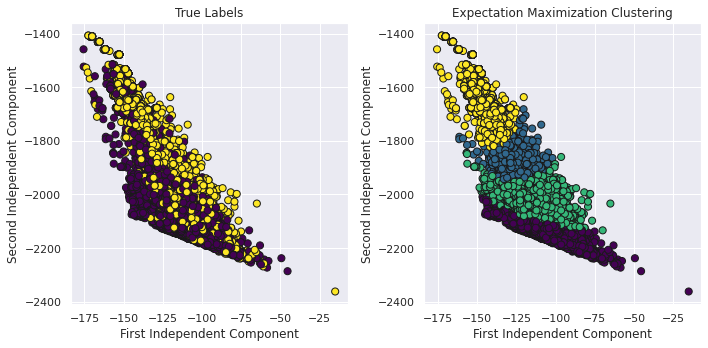

In [54]:
rp = GaussianRandomProjection(n_components=2, random_state=0)
X_rp = rp.fit_transform(X)
    
# Perform Expectation Maximization clustering using GMM on the ICA-transformed data
n_components = 4
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
gmm_labels = gmm.fit_predict(X_rp)

# Visualize the ICA-transformed data and Expectation Maximization clustering results
plt.figure(figsize=(10, 5))

# Plot the true labels
plt.subplot(1, 2, 1)
plt.scatter(X_rp[:, 0], X_rp[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50)
plt.title('True Labels')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')

# Plot the Expectation Maximization clustering results
plt.subplot(1, 2, 2)
plt.scatter(X_rp[:, 0], X_rp[:, 1], c=gmm_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('Expectation Maximization Clustering')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')

plt.tight_layout()
plt.show()


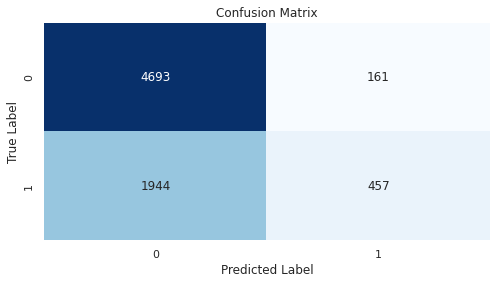

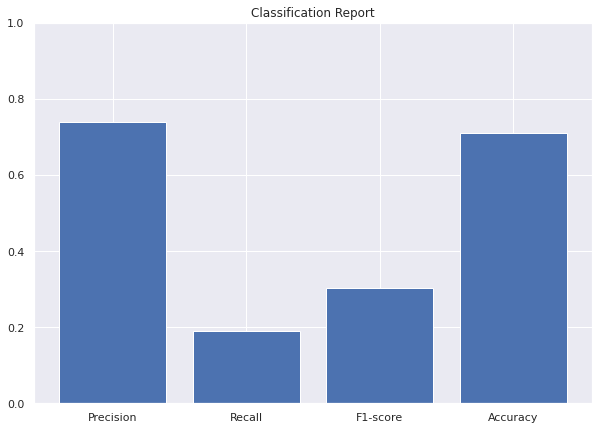

In [55]:
rp = GaussianRandomProjection(n_components=2, random_state=0)
X_rp = rp.fit_transform(X)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rp, Y, test_size=0.2, random_state=0)

# Instantiate a simple feed-forward neural network
clf = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=0)

# Train the neural network on the training set
clf.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = clf.predict(X_test)

# Compute classification metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
metrics = [precision, recall, f1, accuracy]

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the classification report
labels = ['Precision', 'Recall', 'F1-score', 'Accuracy']
plt.bar(labels, metrics)
plt.title('Classification Report')
plt.ylim(0, 1)
plt.show()


## Feature Selection

### Feature Selection for K-Mean  with   Optimal Clusters

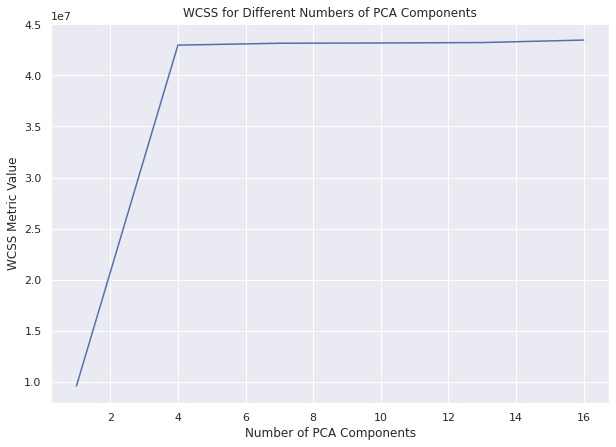

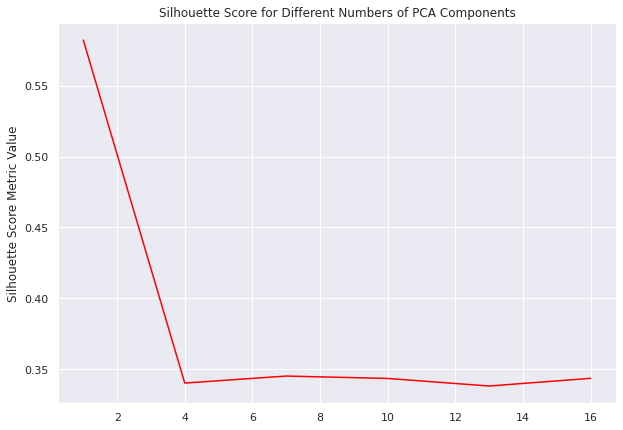

In [56]:

# Set the number of clusters for k-means
n_clusters = 6

# Calculate WCSS and silhouette scores for different numbers of selected features
wcss = []
silhouette_scores = []
max_features = X.shape[1]
for n_features in range(1, max_pca_components + 1,3):
    # Perform feature selection with n_features
    estimator = RandomForestClassifier(n_estimators=100, random_state=0)
    rfe = RFE(estimator, n_features_to_select=n_features)
    X_rfe = rfe.fit_transform(X, Y)
    
    # Perform k-means clustering on the reduced data
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_rfe)
    
    # Calculate WCSS and silhouette score
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_rfe, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot WCSS and silhouette scores for different numbers of ICA components
plt.plot(range(1, max_pca_components + 1,3), wcss, label='WCSS')
plt.xlabel('Number of PCA Components')
plt.ylabel('WCSS Metric Value')
plt.title('WCSS for Different Numbers of PCA Components')
plt.show()

plt.plot(range(1, max_pca_components + 1,3), silhouette_scores, label='Silhouette Score',color='red')
plt.title('Silhouette Score for Different Numbers of PCA Components')
plt.ylabel('Silhouette Score Metric Value')
plt.show()


### Feature Selection for K-Mean  with 2d Data

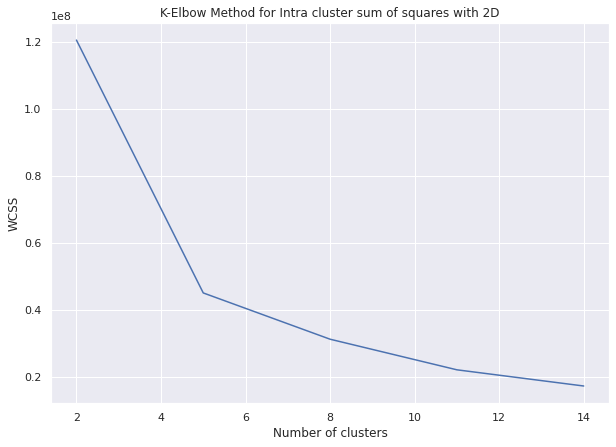

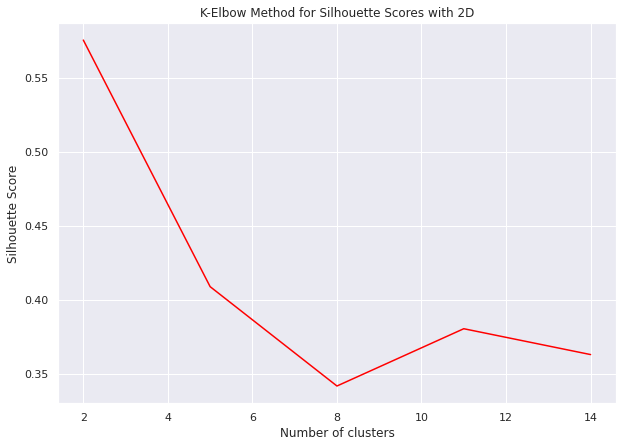

In [57]:

# Set the number of clusters for k-means
n_clusters = 6

# Calculate WCSS and silhouette scores for different numbers of selected features
wcss = []
silhouette_scores = []
nclusters = 15
for ncluster in range(2, nclusters + 1,3):
    # Perform feature selection with n_features
    estimator = RandomForestClassifier(n_estimators=100, random_state=0)
    rfe = RFE(estimator, n_features_to_select=2)
    X_rfe = rfe.fit_transform(X, Y)
    
    # Perform k-means clustering on the reduced data
    kmeans = KMeans(n_clusters=ncluster, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_rfe)
    
    # Calculate WCSS and silhouette score
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_rfe, cluster_labels)
    silhouette_scores.append(silhouette_avg)


# Plot the Elbow Method graph
plt.plot(range(2, nclusters + 1,3), wcss)
plt.title('K-Elbow Method for Intra cluster sum of squares with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot the silhouette scores graph
plt.plot(range(2, nclusters + 1,3), silhouette_scores, color='red')
plt.title('K-Elbow Method for Silhouette Scores with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

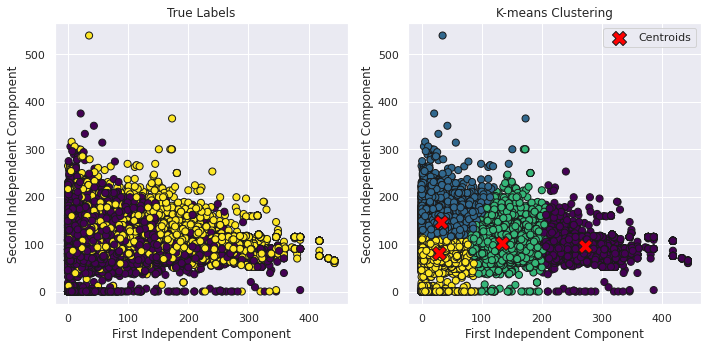

In [58]:
estimator = RandomForestClassifier(n_estimators=100, random_state=0)
rfe = RFE(estimator, n_features_to_select=2)
X_rfe = rfe.fit_transform(X, Y)
    
    # Perform k-means clustering on the reduced data
kmeans = KMeans(n_clusters=clusters_, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_rfe)

# Perform k-means clustering on the ICA-transformed data
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels = kmeans.fit_predict(X_rfe)

# Visualize the ICA-transformed data and k-means clustering results
plt.figure(figsize=(10, 5))

# Plot the true labels
plt.subplot(1, 2, 1)
plt.scatter(X_rfe[:, 0], X_rfe[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50)
plt.title('True Labels')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')

# Plot the k-means clustering results
plt.subplot(1, 2, 2)
plt.scatter(X_rfe[:, 0], X_rfe[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', edgecolor='k', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')
plt.legend()

plt.tight_layout()
plt.show()


### Feature Selection for Expectation Maximization  with  Optimal Clusters

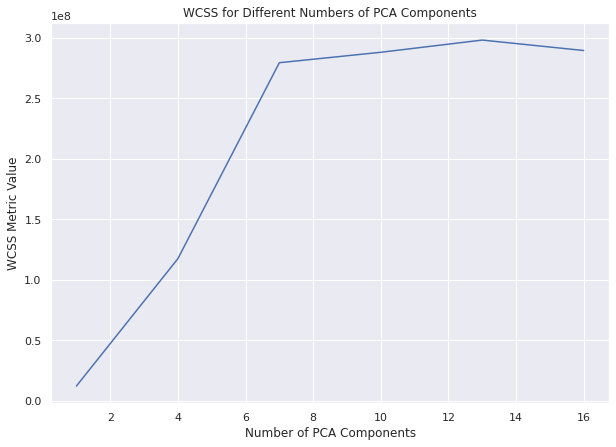

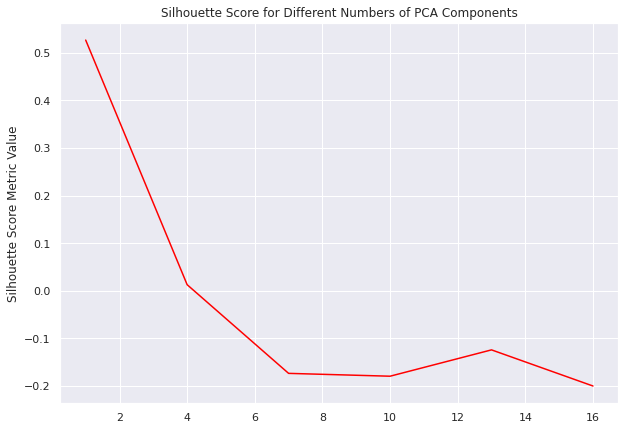

In [59]:

# Set the number of components (clusters) for GMM
n_components = 6

# Calculate WCSS and silhouette scores for different numbers of selected features
wcss = []
silhouette_scores = []
max_features = X.shape[1]
for n_features in range(1, max_pca_components + 1,3):
    # Perform feature selection with n_features
    estimator = RandomForestClassifier(n_estimators=100, random_state=0)
    rfe = RFE(estimator, n_features_to_select=n_features)
    X_rfe = rfe.fit_transform(X, Y)
    
    # Perform Expectation Maximization clustering using GMM on the reduced data
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
    gmm.fit(X_rfe)
    cluster_labels = gmm.predict(X_rfe)
    
    # Calculate WCSS for GMM
    wcss_gmm = np.sum([np.sum((X_rfe[cluster_labels == j] - gmm.means_[j]) ** 2) for j in range(n_components)])
    wcss.append(wcss_gmm)
    
    # Calculate silhouette score for GMM
    silhouette_avg = silhouette_score(X_rfe, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot WCSS and silhouette scores for different numbers of ICA components
plt.plot(range(1, max_pca_components + 1,3), wcss, label='WCSS')
plt.xlabel('Number of PCA Components')
plt.ylabel('WCSS Metric Value')
plt.title('WCSS for Different Numbers of PCA Components')
plt.show()

plt.plot(range(1, max_pca_components + 1,3), silhouette_scores, label='Silhouette Score',color='red')
plt.title('Silhouette Score for Different Numbers of PCA Components')
plt.ylabel('Silhouette Score Metric Value')
plt.show()


### Feature Selection for Expectation Maximization with 2d data

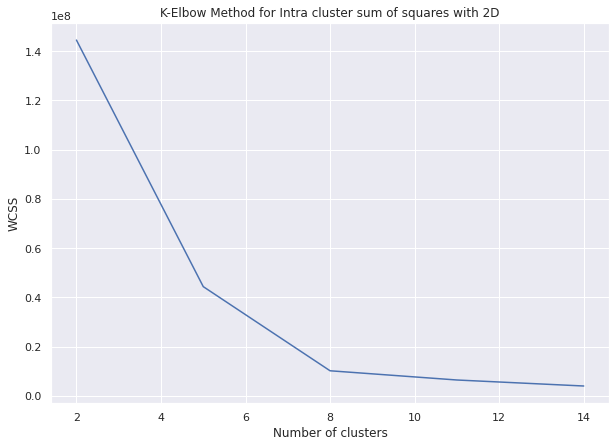

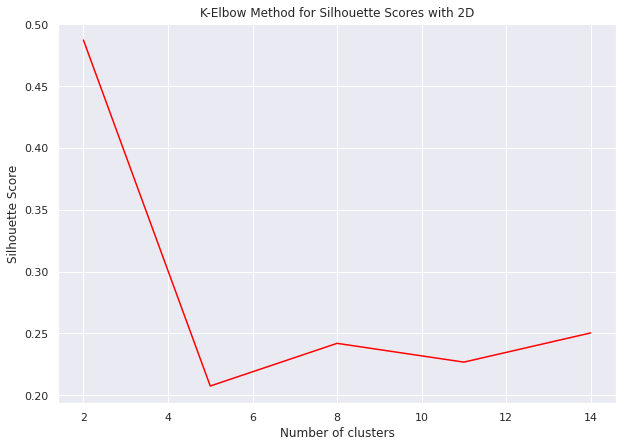

In [60]:

# Set the number of components (clusters) for GMM
n_components = 6

# Calculate WCSS and silhouette scores for different numbers of selected features
wcss = []
silhouette_scores = []
nclusters = 15
for ncluster in range(2, nclusters + 1,3):
    # Perform feature selection with n_features
    estimator = RandomForestClassifier(n_estimators=100, random_state=0)
    rfe = RFE(estimator, n_features_to_select=2)
    X_rfe = rfe.fit_transform(X, Y)
    
    # Perform Expectation Maximization clustering using GMM on the reduced data
    gmm = GaussianMixture(n_components=ncluster, covariance_type='full', random_state=0)
    gmm.fit(X_rfe)
    cluster_labels = gmm.predict(X_rfe)
    
    # Calculate WCSS for GMM
    wcss_gmm = np.sum([np.sum((X_rfe[cluster_labels == j] - gmm.means_[j]) ** 2) for j in range(2)])
    wcss.append(wcss_gmm)
    
    # Calculate silhouette score for GMM
    silhouette_avg = silhouette_score(X_rfe, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method graph
plt.plot(range(2, nclusters + 1,3), wcss)
plt.title('K-Elbow Method for Intra cluster sum of squares with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot the silhouette scores graph
plt.plot(range(2, nclusters + 1,3), silhouette_scores, color='red')
plt.title('K-Elbow Method for Silhouette Scores with 2D')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

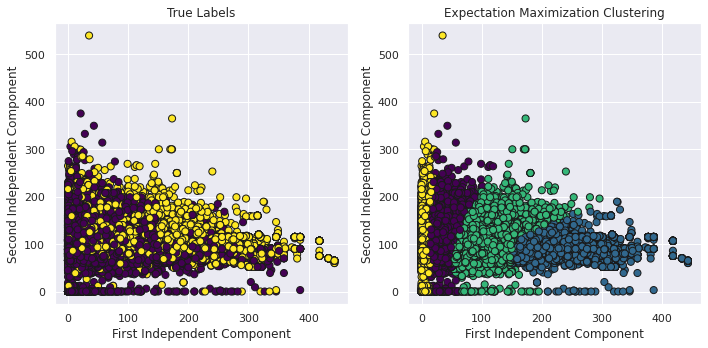

In [61]:
estimator = RandomForestClassifier(n_estimators=100, random_state=0)
rfe = RFE(estimator, n_features_to_select=2)
X_rfe = rfe.fit_transform(X, Y)
    
# Perform Expectation Maximization clustering using GMM on the ICA-transformed data
n_components = 4
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
gmm_labels = gmm.fit_predict(X_rfe)

# Visualize the ICA-transformed data and Expectation Maximization clustering results
plt.figure(figsize=(10, 5))

# Plot the true labels
plt.subplot(1, 2, 1)
plt.scatter(X_rfe[:, 0], X_rfe[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50)
plt.title('True Labels')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')

# Plot the Expectation Maximization clustering results
plt.subplot(1, 2, 2)
plt.scatter(X_rfe[:, 0], X_rfe[:, 1], c=gmm_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('Expectation Maximization Clustering')
plt.xlabel('First Independent Component')
plt.ylabel('Second Independent Component')

plt.tight_layout()
plt.show()


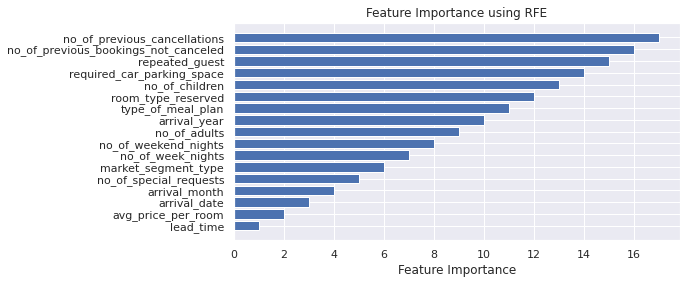

In [62]:

# Instantiate a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Apply RFE with the RandomForestClassifier to find feature importance
selector = RFE(clf, n_features_to_select=1, step=1)
selector = selector.fit(X, Y)

# Get feature importances and sort them
feature_importance = selector.ranking_
sorted_idx = np.argsort(feature_importance)

# Plot the feature importances
plt.figure(figsize=(8, 4))
plt.barh(range(X.shape[1]), feature_importance[sorted_idx], align='center')
plt.yticks(range(X.shape[1]), X_cols[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance using RFE')
plt.show()


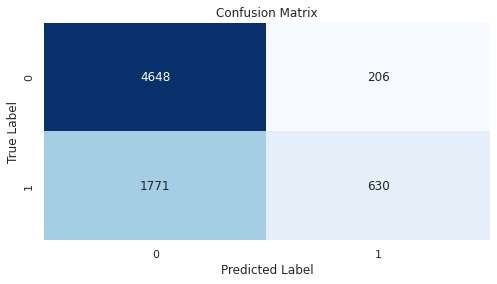

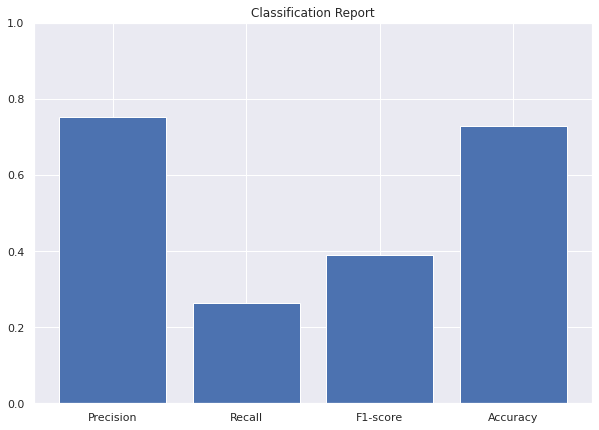

In [63]:

# Instantiate a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Apply RFE with the RandomForestClassifier to find feature importance
selector = RFE(clf, n_features_to_select=1, step=1)
selector = selector.fit(X, Y)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selector.transform(X), Y, test_size=0.2, random_state=0)

# Instantiate a simple feed-forward neural network
clf = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=0)

# Train the neural network on the training set
clf.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = clf.predict(X_test)

# Compute classification metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
metrics = [precision, recall, f1, accuracy]

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the classification report
labels = ['Precision', 'Recall', 'F1-score', 'Accuracy']
plt.bar(labels, metrics)
plt.title('Classification Report')
plt.ylim(0, 1)
plt.show()



## Neural Network with all features

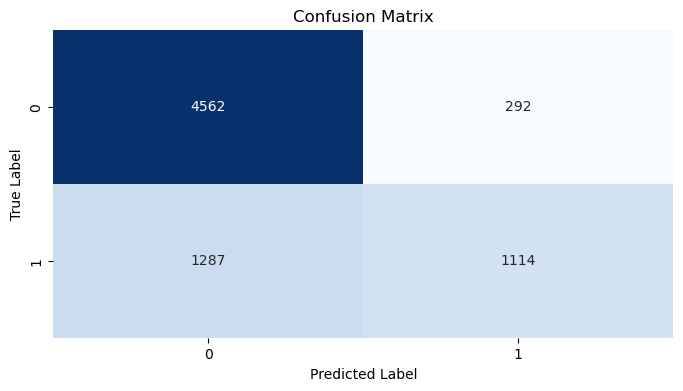

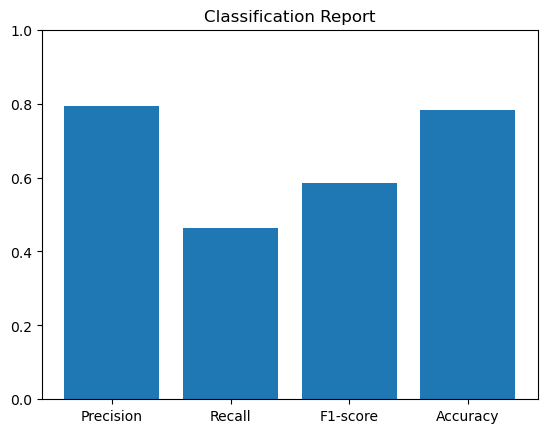

In [12]:


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Instantiate a simple feed-forward neural network
clf = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=0)

# Train the neural network on the training set
clf.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = clf.predict(X_test)

# Compute classification metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
metrics = [precision, recall, f1, accuracy]

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the classification report
labels = ['Precision', 'Recall', 'F1-score', 'Accuracy']
plt.bar(labels, metrics)
plt.title('Classification Report')
plt.ylim(0, 1)
plt.show()

